<a href="https://colab.research.google.com/github/Madihajavaid12345/CodeAlpha_Unemployment-Analysis-with-Python-task-2/blob/main/Task_2_Unemployment_Analysis%2C_codeAlpha_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CodeAlpha Internship – Task 2: Unemployment Analysis with Python

### Submitted by: Madiha Rehan

##  Objective:
Analyze the unemployment rate data of Indian states and visualize trends, seasonal patterns, and the impact of COVID-19 using Python.

##  Tools Used:
- Python
- Pandas
- Matplotlib
- Seaborn
- Google Colab

##  Key Insights:
- Unemployment spiked in early 2020 due to the pandemic.
- Some states showed strong recovery while others did not.
- Seasonal unemployment patterns were identified via heatmaps.
- Visualizations helped highlight economic pressure points.

##  Video Explanation:
[Add your LinkedIn video link here]

##  Dataset:
`Unemployment in India.csv`


In [ ]:
#  Import essential Python libraries
import pandas as pd                # For data handling
import numpy as np                 # For numerical computations
import matplotlib.pyplot as plt    # For visualizations
import seaborn as sns              # For advanced plots


In [ ]:
#  Upload dataset file from your computer
from google.colab import files
uploaded = files.upload()


Saving Unemployment in India.csv to Unemployment in India.csv


In [ ]:
#  Load the uploaded CSV file
df = pd.read_csv("Unemployment in India.csv")  # Make sure filename matches
df.head()  # Show the first 5 rows


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Basic info about the dataset
df.info()

#  Check for missing values
df.isnull().sum()

#  Statistical summary
df.describe()

# See all column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
# Step 1: Remove extra spaces from all column names
df.columns = df.columns.str.strip()

# Step 2: Rename columns for easier access (optional but helpful)
df.rename(columns={
    'Region': 'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)

# Step 3: Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 4: Extract 'Month' and 'Year' from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year



/tmp/ipython-input-10-2340407758.py:11: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


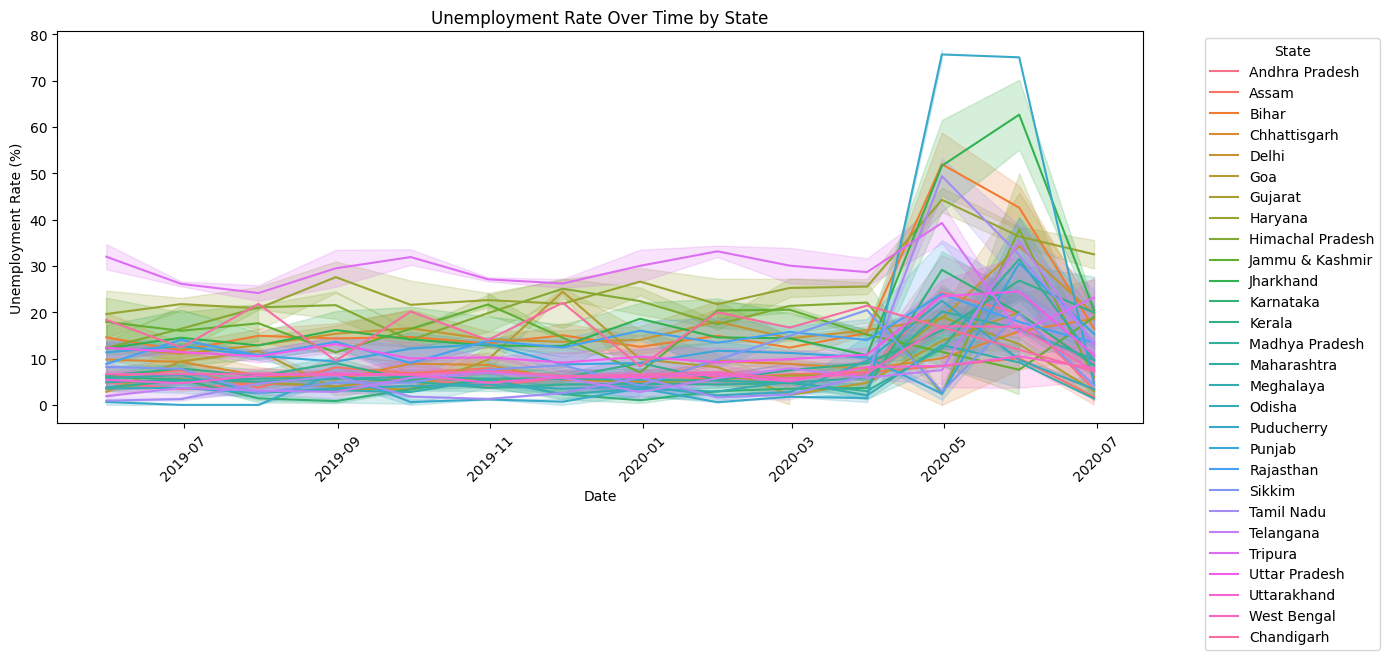

In [ ]:
# 📈 Line Plot: Unemployment Rate over Time by State
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='State')
plt.title("Unemployment Rate Over Time by State")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


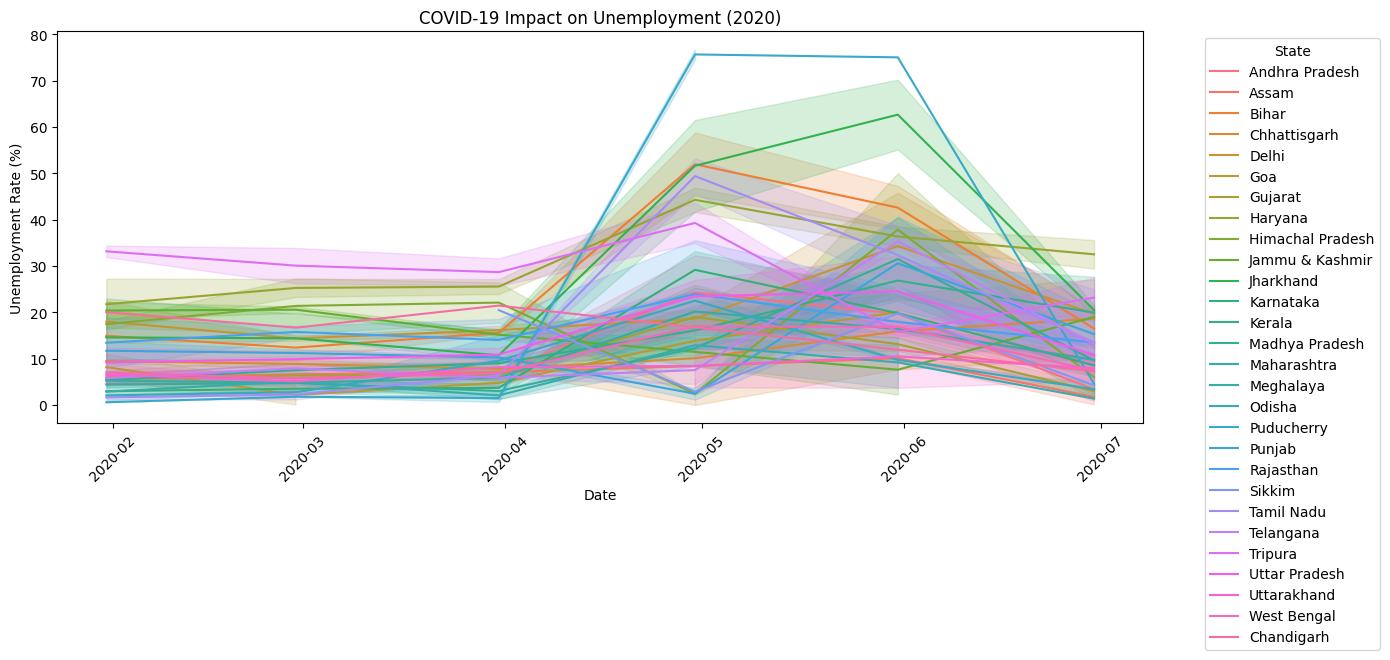

In [ ]:
# 📉 Filter data for 2020 (COVID-19 impact)
covid_df = df[df['Year'] == 2020]

# 📍 Line Plot: Unemployment Rate during COVID-19 in 2020
plt.figure(figsize=(14, 6))
sns.lineplot(data=covid_df, x='Date', y='Unemployment_Rate', hue='State')
plt.title("COVID-19 Impact on Unemployment (2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


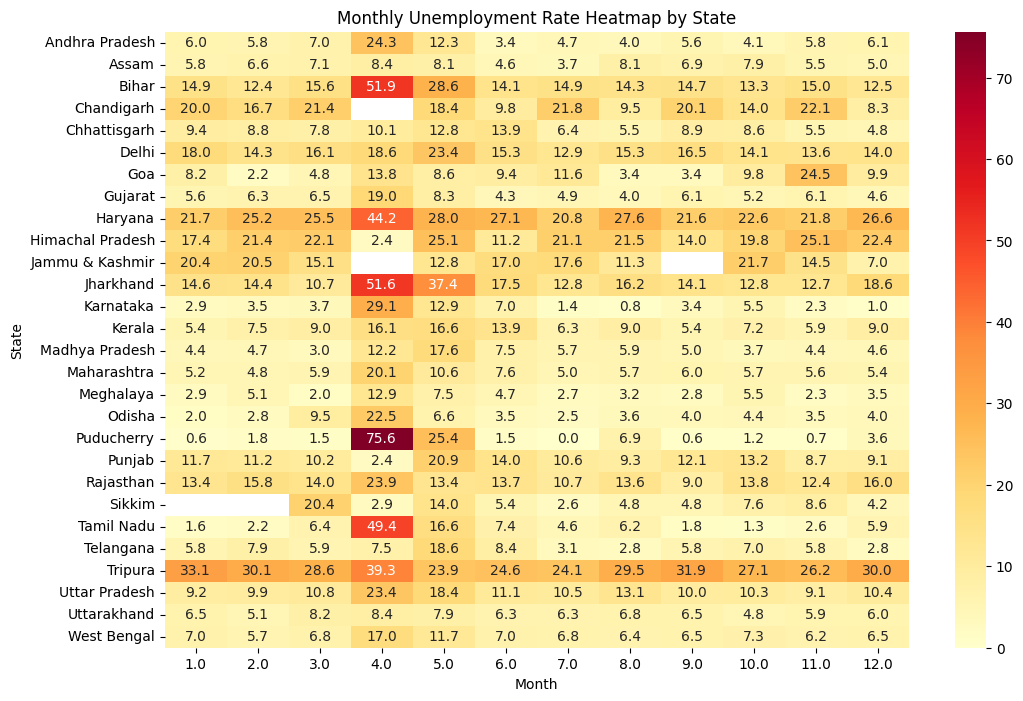

In [ ]:
# 🔥 Create a Pivot Table: Average unemployment per state per month
heatmap_data = df.pivot_table(values='Unemployment_Rate', index='State', columns='Month')

# 🌡️ Heatmap: Monthly trends by state
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title("Monthly Unemployment Rate Heatmap by State")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()
